#<div dir=rtl>
<h1> <b>توضیحات</b></h1>
</div>

<div dir=rtl>در CHRF هم پوشانی از کلمات به کاراکتر ها تغییر میکند و از F-score برای
محاسبه آن استفاده میکنیم. F-score بر پایه precision و recall است

فرمول محاسبه CHRF در زیر مبینید.
</div>

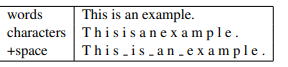

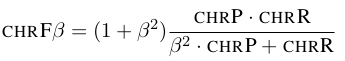




<div dir=rtl>

* CHRP (precision)

    درصد n-گرم در ترجمه ماشینی که مشابهی در مرجع دارند.


* CHRR (recall)

    درصد کاراکتر n-gram در مرجع که در ترجمه ماشینی نیز وجود دارد.


</div>

<div dir=rtl>
حال از روی کد توضیح میدهیم :‌
</div>




```
class chrf:

	def __init__(self, min_size_ngram = 1, max_size_ngram = 6):

		self.min_size_ngram = min_size_ngram
		self.max_size_ngram = max_size_ngram
		self.beta = 3 # chrf3
```
<div dir=rtl>

**β :**



```
		self.beta = 3 # chrf3

```



استاندارد CHR F با β = 1 یعنی میانگین هارمونیک recall و precision وزن یکسانی دارند،و همچنین CHR F3 که در آن β = 3، یعنی recall سه برابر وزن بیشتری دارد. عدد 3 به صورت دلخواه به عنوان مقدار اولیه در نظر گرفته شده است،و CHR F3 فقط بر روی داده های WMT 14 آزمایش می شود - آزمایش های سیستماتیک تری در این جهت باید در کار آینده انجام شود.
</div>

<div dir=rtl>

**size n - gram :**


```
		self.min_size_ngram = min_size_ngram
		self.max_size_ngram = max_size_ngram
```


به عنوان اولین قدم، ما چندین آزمایش را در مورد طول n گرم انجام دادیم.از آنجایی که n بهینه برای معیارهای مبتنی بر کلمه n = 4 نشان داده شده است،علاوه بر این، ما یک n پویا را که برای هر جمله به عنوان میانگین طول کلمه محاسبه می‌شود، بررسی کردیم. بهترین همبستگی‌ها برای 6 گرم به دست می‌آید، بنابراین آزمایش‌های بیشتری را فقط روی آنها انجام دادیم.

</div>






<div dir=rtl>

**شروع محاسبه :**
</div>


```

	def chrf_score(self, ref, pred):


		ref = self._preprocess(ref)
		pred = self._preprocess(pred)

```

<div dir=rtl>

در اینجا ابتدا جملات را پیش پردازش کنیم چون بر اساس کاراکتر است باید تمام فاصله ها و همچنین علاعم نگارشی را از حذف کنیم.
</div>



```
	def _preprocess(self, text):
		translator = str.maketrans('', '',string.punctuation)
	    text = text.translate(translator)
		return "".join([char for char in text if char != " "])
```


<div dir=rtl>

حالا به سراغ محاسبه امتیاز میرویم :‌
</div>

```
	for n in range(self.min_size_ngram, self.max_size_ngram + 1):
			ref_ngrams = ngrams(ref, n, True)
			pred_ngrams = ngrams(pred, n, True)

			Precision_recall = precision_recall(ref_ngrams, pred_ngrams)
			chrf = None
			try:
				chrf = ((1 + self.beta ** 2) * Precision_recall["precision"] * Precision_recall["recall"]) / (self.beta ** 2 * Precision_recall["precision"] + Precision_recall["recall"])
			except ZeroDivisionError:
				chrf = 0
			chrf_scores.append(chrf)
```

<div dir=rtl>

ابتدا  gram را برای هر یک از N حساب کنیم و سپس به وسیله تابع precision ,precision_recall و recall را محاسبه میکنیم
</div>




```
def precision_recall(ref_ngram, predict_ngram):
  ref_ngram_count = counter_element(ref_ngram)
  predict_ngram_count = counter_element(predict_ngram)

  tp = sum(overlaps_dict(ref_ngram_count, predict_ngram_count).values())
  tpfp = sum(predict_ngram_count.values())
  tpfn = sum(ref_ngram_count.values())
  precision = tp / tpfp
  recall = tp / tpfn

  return {
    "precision" : precision,
    "recall" : recall
  }

```
<div dir=rtl>
برای مفهوم  <b>recall</b> و  <b>pecision</b>  ابتدا یک یادآوری میکنیم
</div>


<div dir=rtl>

</div>

<div dir=rtl>
  <b>confusion matrix</b>
</div>


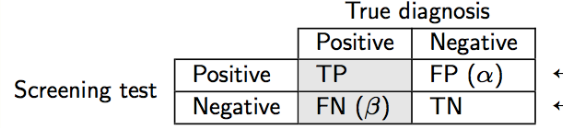


<div dir=rtl>
<b>Precision</b>
</div>


<div dir=rtl>
در ساده‌ترین عبارت، Precision نسبت بین پیش بینی های مثبت که در واقع مثبت بودند  و همه پیش بینی های مثبت است

یا

 درصدی از پیش‌بینی‌های مثبت مدل است که درست هستند


$precision = \frac{tp}{tp + fp}$
</div>


---


<div dir=rtl>
<b>recall</b>
</div>


<div dir=rtl>
در ساده‌ترین عبارت، recall نسبت بین پیش بینی های مثبت که در واقع مثبت بودند  و همه پیش بینی های مثبت که در واقع مثبت اند به علاوه   همه پیش بینی های منفی که در واقع مثبت اند است

یا

 درصد موارد مثبتی است که مدل به درستی پیش‌بینی می‌کند

$recall = \frac{tp}{tp + fn}$
</div>

---

<div dir=rtl>
بهتر است این پارامتر ها را در این نوع مساعل چگونه حساب میشود
</div>


<div dir=rtl>

<b>tp</b> : اعضای مشترک در جمله مرجع و جمله ترجمه شده توسط جمله، یعنی آنهایی که به درستی پیش بینی شده اند (ترجمه صحیح تلقی می شوند) و واقعاً درست هستند زیرا با جمله مرجع مشترک هستند.
</div>



```
  tp = sum(overlaps_dict(ref_ngram_count, predict_ngram_count).values())

```



<div dir=rtl>

<b>tp + fp</b> : در جمله ترجمه شده توسط ماشین ها، مواردی که به درستی ترجمه شده اند و واقعاً صحیح هستند و مواردی که صحیح تلقی می شوند اما اشتباه هستند.
</div>


```
  tpfp = sum(predict_ngram_count.values())

```







<div dir=rtl>
<b>tp + fn</b> : در جمله مرجع مواردی هستند که به درستی ترجمه شده اند و واقعاً صحیح هستند و آنهایی که به عنوان ترجمه های اشتباه تلقی می شوند اما صحیح هستند.
</div>


```
  tpfn = sum(ref_ngram_count.values())
```


<div dir=rtl>
<b>Precision and recall : </b>
</div>



```
      Precision_recall = precision_recall(ref_ngrams, pred_ngrams)
      chrf = None
      try:
        chrf = ((1 + self.beta ** 2) * Precision_recall["precision"] * Precision_recall["recall"]) / (self.beta ** 2 * Precision_recall["precision"] + Precision_recall["recall"])
      except ZeroDivisionError:
        chrf = 0
      chrf_scores.append(chrf)

```



<div dir=rtl>
<b>و در اخر به این صورت امتیاز این متریک محاسبه میشود</b>
</div>


```
		return sum(chrf_scores) / len(chrf_scores)
```



In [ ]:
f"ok"

'ok'

#<div dir=rtl>
<h1> <b>کد</b></h1>
</div>

##<div dir=rtl>
<h3> <b>ابزار ها</b></h3>
</div>

In [ ]:
def counter_element(temp):
  counter = {}
  for element in temp:
    counter[element] = counter[element] + 1 if element in counter else 1
  return counter



def ngrams(text, n, ignore_split = False):
  if ignore_split:
    return [tuple(text[index : index + n]) for index in range(0, len(text) - n + 1)]
  else:

    text = text.lower()
    words = text.split()
    return [tuple(words[index : index + n]) for index in range(0, len(words) - n + 1)]

def overlaps_dict(dict1, dict2):

  overlaps = dict()
  for key in dict1:
    if key in dict2:
      _val_overlaps = min(dict1[key], dict2[key])
      overlaps.update({key : _val_overlaps})
  return overlaps

##<div dir=rtl>
<h3> <b>کد اصلی</b></h3>
</div>

In [ ]:
class chrf:
  def __init__(self, min_size_ngram = 1, max_size_ngram = 6):
    self.min_size_ngram = min_size_ngram
    self.max_size_ngram = max_size_ngram
    self.beta = 3 # chrf3

  def chrf_score(self, ref, pred):
    ref = self._preprocess(ref)
    pred = self._preprocess(pred)

    chrf_scores = list()
    for n in range(self.min_size_ngram, self.max_size_ngram + 1):
      ref_ngrams = ngrams(ref, n, True)
      pred_ngrams = ngrams(pred, n, True)

      Precision_recall = self._precision_recall(ref_ngrams, pred_ngrams)
      chrf = None
      try:
        chrf = ((1 + self.beta ** 2) * Precision_recall["precision"] * Precision_recall["recall"]) / (self.beta ** 2 * Precision_recall["precision"] + Precision_recall["recall"])
      except ZeroDivisionError:
        chrf = 0
      chrf_scores.append(chrf)

    return sum(chrf_scores) / len(chrf_scores)

  def _precision_recall(self, ref_ngram, predict_ngram):
    ref_ngram_count = counter_element(ref_ngram)
    predict_ngram_count = counter_element(predict_ngram)

    tp = sum(overlaps_dict(ref_ngram_count, predict_ngram_count).values())
    tpfp = sum(predict_ngram_count.values())
    tpfn = sum(ref_ngram_count.values())
    precision = tp / tpfp
    recall = tp / tpfn

    return {
	    "precision" : precision,
	    "recall" : recall
	  }


  def _preprocess(self, text):
    import string
    translator = str.maketrans('', '',string.punctuation)
    text = text.translate(translator)
    return "".join([char for char in text if char != " "])

##<div dir=rtl>
<h3> <b>تست کد با مثال</b></h3>
</div>

In [ ]:
model = chrf()

##<div dir=rtl>
<h4> <b>جملات یکسان</b></h4>
</div>

In [ ]:
ref = "this is a blue ball"
pred = "this is a blue ball"
model.chrf_score(ref, pred)

1.0

##<div dir=rtl>
<h4> <b>جملات کاملا متفاوت ۱</b></h4>
</div>

In [ ]:
ref = "this is a blue ball"
pred = "Recall is the percent of positive cases"
model.chrf_score(ref, pred)

0.17313086142200065



<div dir=rtl>
نقطه ضعف این متریک این است که اگر حتی دو جمله کاملا متفاوت باشند ولی باز هم به طور تصادفی کارکتر های یکسان در انها یافت شود
</div>

##<div dir=rtl>
<h4> <b>جملات کاملا متفاوت ۲</b></h4>
</div>

In [ ]:
ref = "this is a blue ball"
pred = "x z v w g m"
model.chrf_score(ref, pred)

0.0

#<div dir=rtl>
<h1> <b>نتیجه گیری</b></h1>
</div>




<div dir=rtl>

عدد خروجی این متریک بین صفر و یک است

* یک به معنای تطابق صد در صدی با جمله مرجع

* صفر به معنای عدم تطابق صد در صدی با جمله مرجع

</div>

<div dir=rtl>
<h1> <b>منابع</b></h1>
</div>

* [ref - 1](https://www.statmt.org/wmt15/pdf/WMT49.pdf)

* [ref - 2](https://www.mdpi.com/2227-7390/11/4/1006)